#### 1. "caret", "tidyverse", "data.table" 패키지를 부착하고 출력 그래프의 크기를 원하는 크기로 알맞게 설정하세요.


In [ ]:
install.packages("caret") #데이터 분할
library(caret)
library(tidyverse)
library(data.table)
library(repr) # 출력 그래프 크기 변경
options(repr.plot.width=7, repr.plot.height=7)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to beco

#### 2. 제시된 titanic_train.csv(https://www.kaggle.com/c/titanic/data) 파일을 다운로드 받아 자신의 코랩에 저장한 후 titanic_raw에 tibble 형태로 읽어 들여 확인하세요.
(Hint)system(),fread()

In [ ]:
system("gdown --id 1eLaYZDYA1AJpm7KLIRjZa3YT_r9URqEZ")
system("ls", TRUE)

titanic_raw <- fread("/content/titanic_train.csv",header = T, encoding = "UTF-8") %>% as_tibble()
titanic_raw %>% show()

[1] "sample_data"       "titanic_train.csv"

# A tibble: 891 × 12
   PassengerId Survived Pclass Name   Sex     Age SibSp Parch Ticket  Fare Cabin
         <int>    <int>  <int> <chr>  <chr> <dbl> <int> <int> <chr>  <dbl> <chr>
 1           1        0      3 Braun… male     22     1     0 A/5 2…  7.25 ""   
 2           2        1      1 Cumin… fema…    38     1     0 PC 17… 71.3  "C85"
 3           3        1      3 Heikk… fema…    26     0     0 STON/…  7.92 ""   
 4           4        1      1 Futre… fema…    35     1     0 113803 53.1  "C12…
 5           5        0      3 Allen… male     35     0     0 373450  8.05 ""   
 6           6        0      3 Moran… male     NA     0     0 330877  8.46 ""   
 7           7        0      1 McCar… male     54     0     0 17463  51.9  "E46"
 8           8        0      3 Palss… male      2     3     1 349909 21.1  ""   
 9           9        1      3 Johns… fema…    27     0     2 347742 11.1  ""   
10          10        1      2 Nasse… fema…    14     1     0 237736 30.1  ""   
# ℹ 881

#### 3. 아래는 titanic_raw에서 팩터 형태로 저장되어야 하는 데이터를 확인하는 방법입니다. 데이터를 읽어 들이는 과정에서 팩터 데이터들의 타입이 변경되어 정수나 문자열로 지정되어 있습니다. 팩터 형태로 저장되어야 하는 데이터들을 팩터로 변경하고 분석에 영향을 미치지 않는 변수들은 제외하여 titanic에 저장하세요.
(Hint) 분석에 영향을 미치지 않으므로 제외(-PassengerId, -Name, -Cabin, -Ticket), select(-)

(Hint) 팩터("Survived", "Pclass", "Sex","Embarked")로 변경, mutate_at()

In [ ]:
titanic <-
  #select(titanic_raw, PassengerId, -Name , -Ticket , -Cabin) %>%
  #select(titanic_raw, PassengerId, Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked) %>%
  select(titanic_raw, PassengerId, Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked) %>%
  mutate_at(c("Survived", "Pclass", "Sex", "Embarked"), factor)

titanic %>% str()
titanic %>% show()

tibble [891 × 9] (S3: tbl_df/tbl/data.frame)
 $ PassengerId: int [1:891] 1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass     : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Fare       : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...
 - attr(*, ".internal.selfref")=<externalptr> 
# A tibble: 891 × 9
   PassengerId Survived Pclass Sex      Age SibSp Parch  Fare Embarked
         <int> <fct>    <fct>  <fct>  <dbl> <int> <int> <dbl> <fct>   
 1           1 0        3      male      22     1     0  7.25 S       
 2           2 1        1      female    38     1     0 71.3  C       
 3           3 1        3      female

#### 4. titanic %>% summary() 정보를 확인하면 모든 NA는 Age에서 발견됩니다. titanic 사고 시 사망자의 나이를 특정할 수 없을 수도 있을 것이라는 생각이 듭니다. NA의 삭제 여부는 분석자의 몫입니다. NA를 어떻게 처리할 생각이신가요? 이번 분석에서는 NA를 삭제하세요.
(Hint)Hmisc::impute(), na.omit()

In [ ]:
table(is.na(titanic))

titanic <- titanic %>% na.omit()

table(is.na(titanic))


FALSE  TRUE 
 7842   177 


FALSE 
 6426 

#### 5. titanic 데이터를 titanic$Survived를 기준으로 90%는 학습 데이터(train_titanic)로, 나머지는테스트 데이터(test_titanic)로 분리하세요.
(Hint) caret::createDataPartition()

In [ ]:
set.seed(35)

index <- caret::createDataPartition(
  y = titanic$Survived, p=0.9, list=FALSE)

train_titanic <- titanic[index,]
test_titanic <- titanic[-index,]

train_titanic %>% show()

# A tibble: 803 × 9
   PassengerId Survived Pclass Sex      Age SibSp Parch  Fare Embarked
         <int> <fct>    <fct>  <fct>  <dbl> <int> <int> <dbl> <fct>   
 1           1 0        3      male      22     1     0  7.25 S       
 2           2 1        1      female    38     1     0 71.3  C       
 3           3 1        3      female    26     0     0  7.92 S       
 4           4 1        1      female    35     1     0 53.1  S       
 5           5 0        3      male      35     0     0  8.05 S       
 6           6 0        3      male      NA     0     0  8.46 Q       
 7           7 0        1      male      54     0     0 51.9  S       
 8           8 0        3      male       2     3     1 21.1  S       
 9           9 1        3      female    27     0     2 11.1  S       
10          10 1        2      female    14     1     0 30.1  C       
# ℹ 793 more rows


#### 6. train_titanic 데이터와 rpart()을 이용하여 DecisionTree 모델 dtm_titanic을 생성하고 확인하세요. Variable importance를 확인하여 Survived에 가장 큰 영향을 미치는 인자가 무엇인지도 확인하세요.
(Hint) rpart(), summary()


In [ ]:
library(rpart)

In [ ]:
dtm_titanic <- rpart(
  formula = Survived ~ .,
  data = train_titanic,
  method = "class"
)

summary(dtm_titanic)

Call:
rpart(formula = Survived ~ ., data = train_titanic, method = "class")
  n= 803 

          CP nsplit rel error    xerror       xstd
1 0.42207792      0 1.0000000 1.0000000 0.04473727
2 0.04058442      1 0.5779221 0.5779221 0.03821567
3 0.02759740      3 0.4967532 0.5584416 0.03774595
4 0.01000000      5 0.4415584 0.4967532 0.03613216

Variable importance
        Sex      Pclass        Fare       SibSp    Embarked       Parch 
         42          15          14           8           7           5 
        Age PassengerId 
          4           4 

Node number 1: 803 observations,    complexity param=0.4220779
  predicted class=0  expected loss=0.3835616  P(node) =1
    class counts:   495   308
   probabilities: 0.616 0.384 
  left son=2 (519 obs) right son=3 (284 obs)
  Primary splits:
      Sex      splits as  RL,           improve=104.78980, (0 missing)
      Pclass   splits as  RRL,          improve= 44.55604, (0 missing)
      Fare     < 10.48125 to the left,  improve= 37.61

#### 7. 과잉적합에 빠지지 않도록 모델 dtm_titanic에 가지치기(pruning)를 하려고 합니다. xerror(cross validation error)가 최소가 되는 CP를 min_xerror_cp에 저장하세요.
(Hint)dtm_titanic$cptable, as_tibble(), filter, pull()


In [ ]:
dtm_titanic$cptable

,CP,nsplit,rel error,xerror,xstd
1,0.42207792,0,1.0000000,1.0000000,0.04473727
2,0.04058442,1,0.5779221,0.5779221,0.03821567
3,0.02759740,3,0.4967532,0.5584416,0.03774595
4,0.01000000,5,0.4415584,0.4967532,0.03613216


In [ ]:
min_xerror_cp <-
  dtm_titanic$cptable %>%
    as_tibble() %>%
    filter(xerror == min(xerror)) %>%
    pull(CP)
cat("min_xerror_cp" , min_xerror_cp)

min_xerror_cp 0.01

#### 8. 위에서 구한 min_xerror_cp 값을 이용하여 모델 dtm_titanic에 가지치기(pruning)를 수행한 후 dtm_pr_titanic에 저장하고 확인하세요.
(Hint) rpart::prune()


In [ ]:
dtm_pr_titanic <-
  rpart::prune(dtm_titanic, cp = min_xerror_cp)

summary(dtm_pr_titanic)

Call:
rpart(formula = Survived ~ ., data = train_titanic, method = "class")
  n= 803 

          CP nsplit rel error    xerror       xstd
1 0.42207792      0 1.0000000 1.0000000 0.04473727
2 0.04058442      1 0.5779221 0.5779221 0.03821567
3 0.02759740      3 0.4967532 0.5584416 0.03774595
4 0.01000000      5 0.4415584 0.4967532 0.03613216

Variable importance
        Sex      Pclass        Fare       SibSp    Embarked       Parch 
         42          15          14           8           7           5 
        Age PassengerId 
          4           4 

Node number 1: 803 observations,    complexity param=0.4220779
  predicted class=0  expected loss=0.3835616  P(node) =1
    class counts:   495   308
   probabilities: 0.616 0.384 
  left son=2 (519 obs) right son=3 (284 obs)
  Primary splits:
      Sex      splits as  RL,           improve=104.78980, (0 missing)
      Pclass   splits as  RRL,          improve= 44.55604, (0 missing)
      Fare     < 10.48125 to the left,  improve= 37.61

#### 9. fancyRpartPlot()을 이용하여 dtm_titanic와 dtm_pr_titanic의 DecisionTree를 비교하세요.


In [ ]:
install.packages(c("rattle", "rpart.plot)"))

library(rattle)
library(rpart.plot)
library(RColorBrewer)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘rpart.plot)’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
also installing the dependency ‘XML’


Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.5.1 Copyright (c) 2006-2021 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



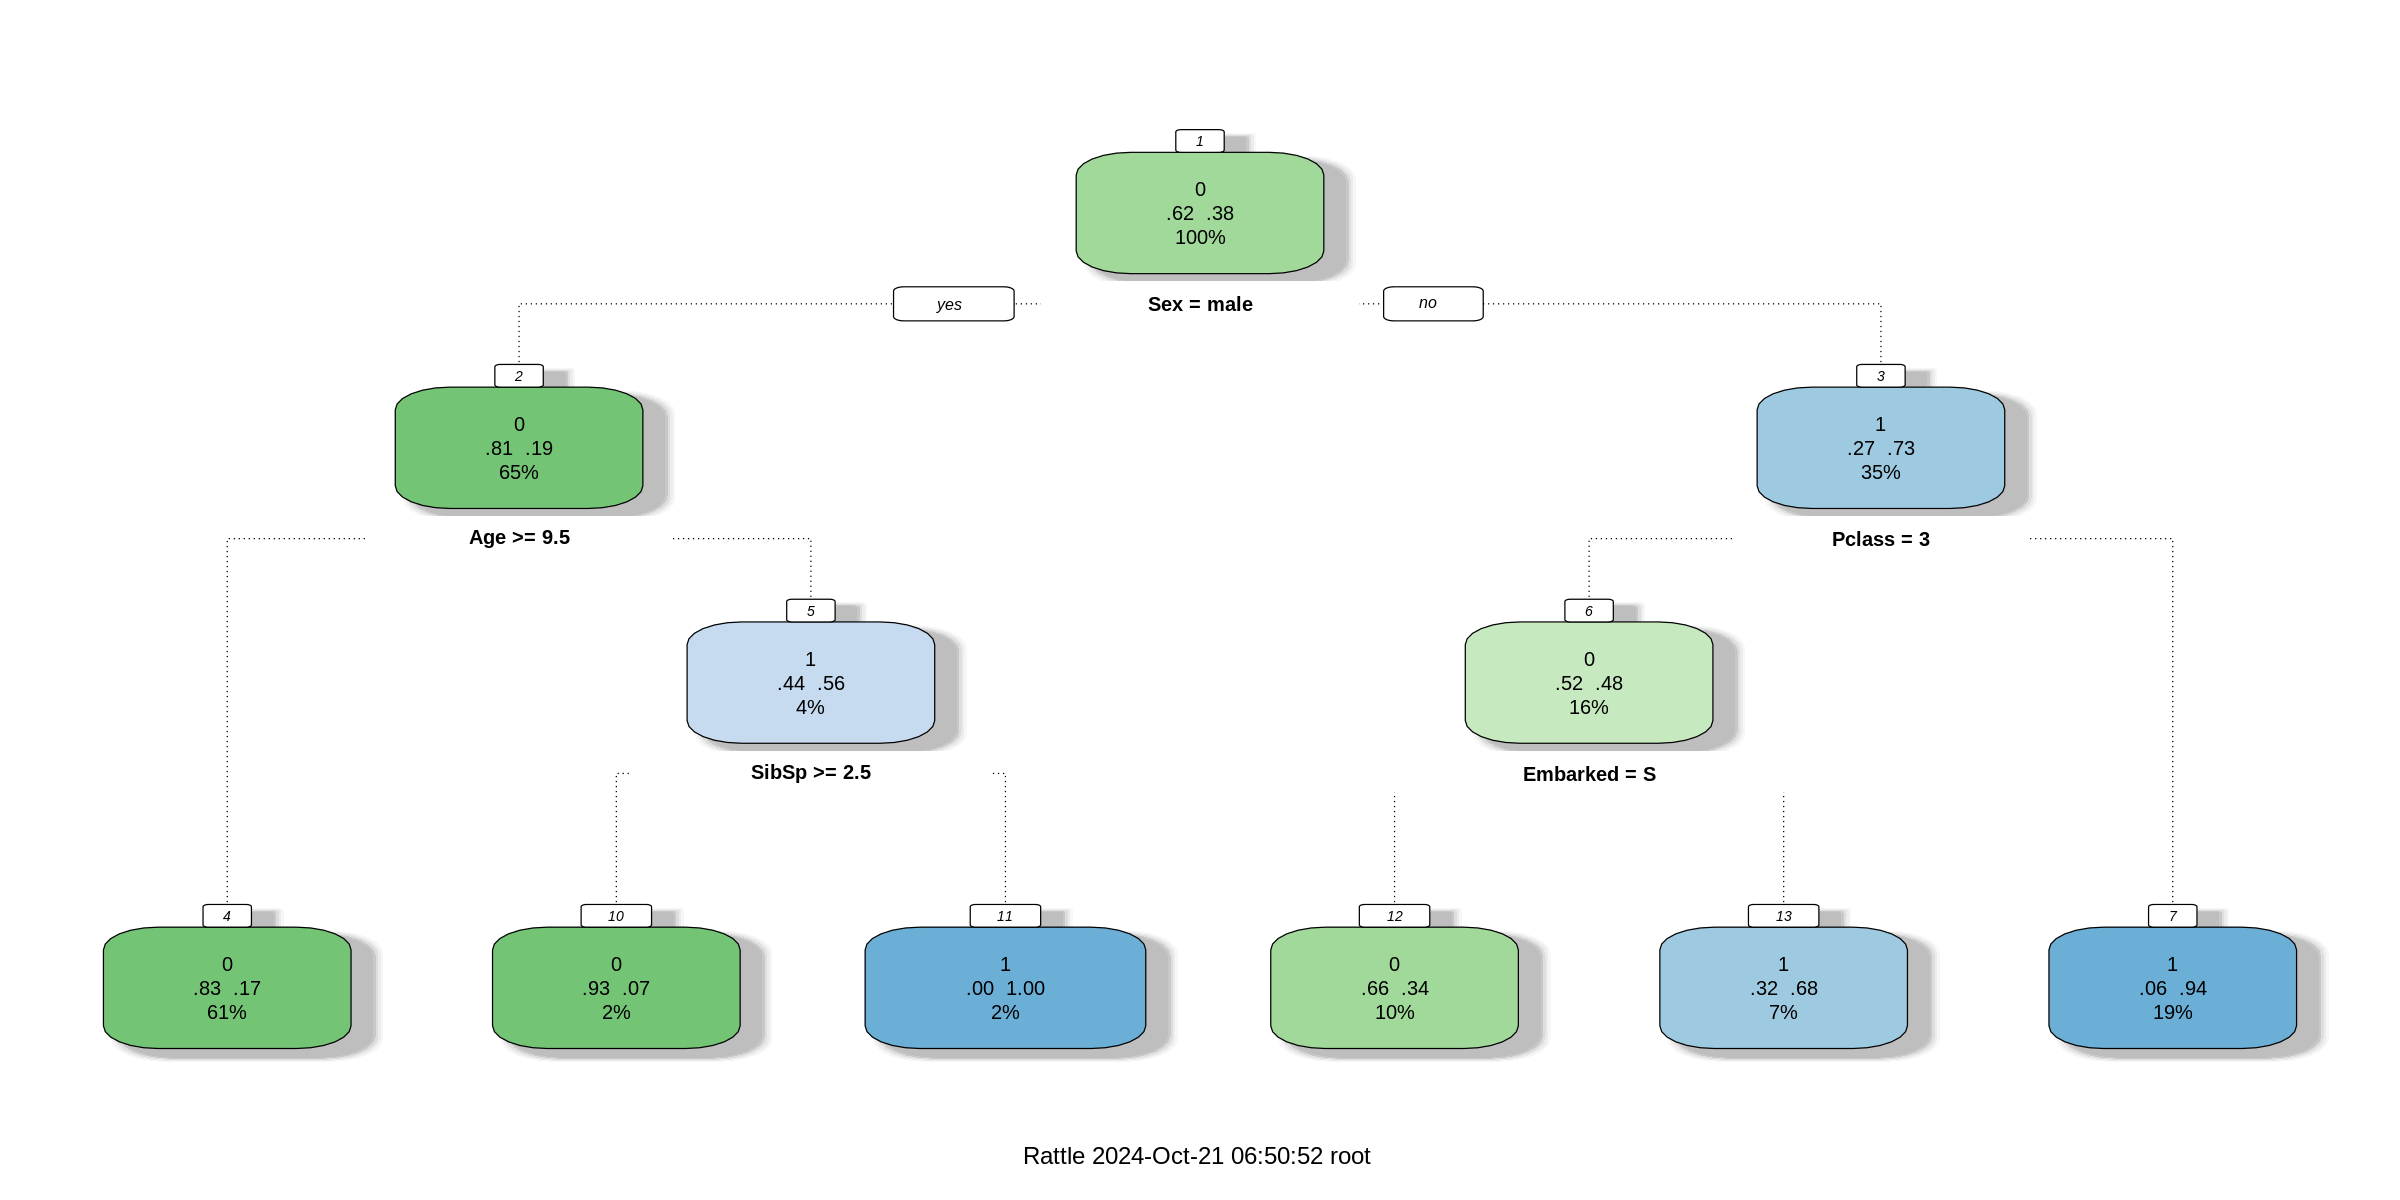

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 10)

fancyRpartPlot(dtm_titanic)

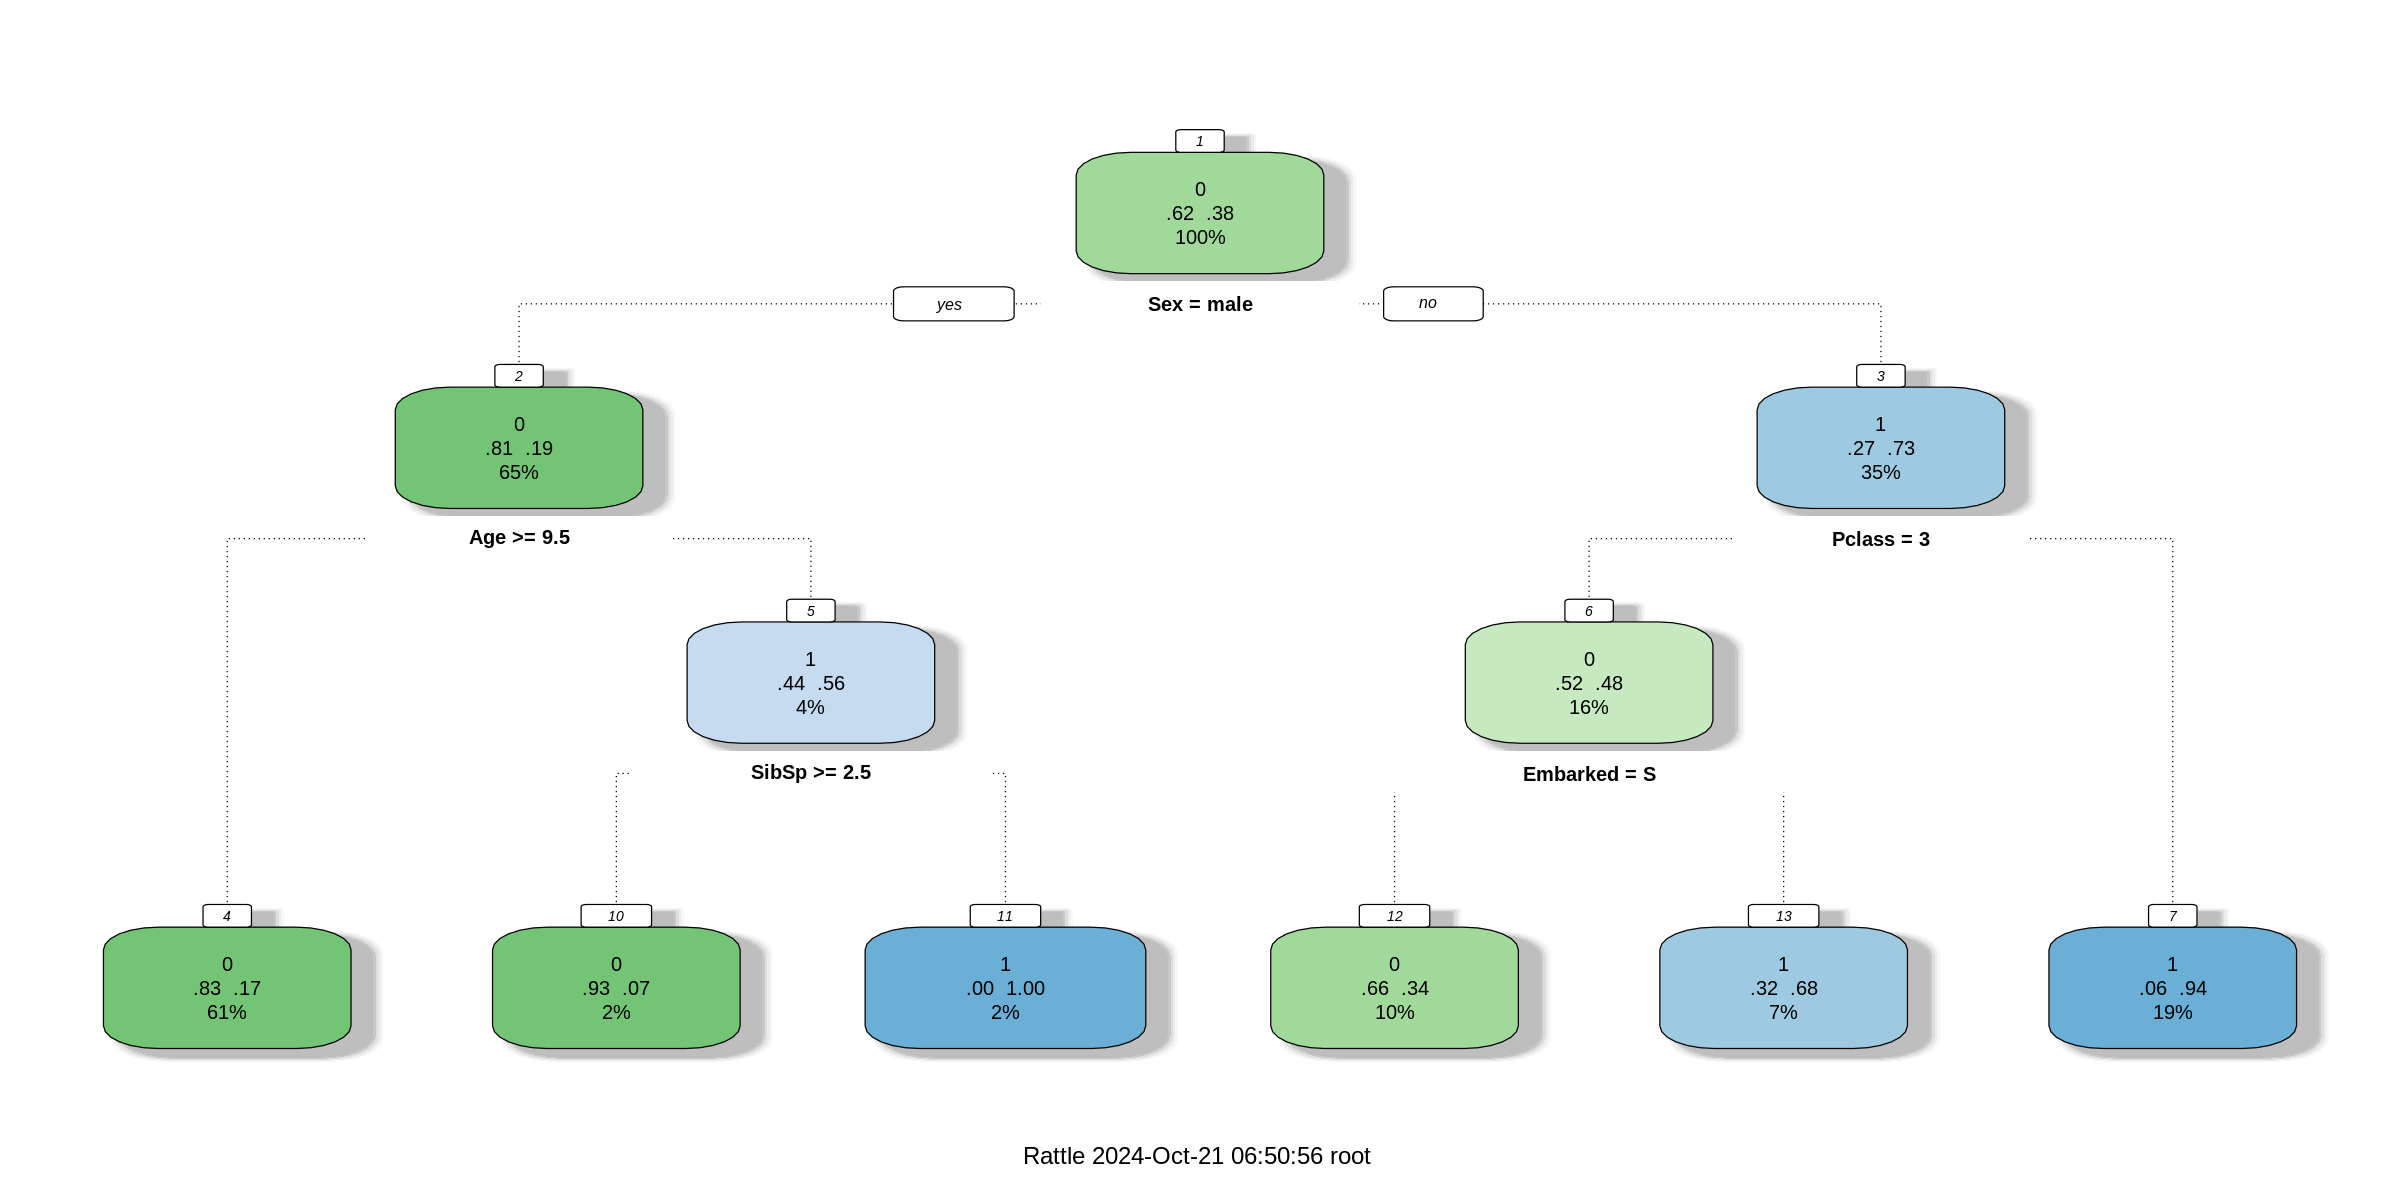

In [ ]:
fancyRpartPlot(dtm_pr_titanic)

#### 10. 모델 dtm_pr_titanic을 사용하여 test_titanic 데이터로 예측을 수행한 후 예측값을 predict_value에 저장하고 확인하세요.
(Hint) predict()


In [ ]:
#PassengerId, Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked
predict_value <-
  predict(dtm_pr_titanic,
  test_titanic,
  type = "class")%>%
    tibble(predict_value = .)

predict_value %>% show()

# A tibble: 88 × 1
   predict_value
   <fct>        
 1 0            
 2 0            
 3 0            
 4 0            
 5 1            
 6 0            
 7 1            
 8 0            
 9 0            
10 0            
# ℹ 78 more rows


#### 11. test_titanic 데이터의 Survived와 위 문제에서 구한 predict_value를 묶어 real_predict 티블에저장하고 확인하세요.
(Hint) select(), bind_cols()

In [ ]:
real_predict <-
  test_titanic %>%
    select(Survived) %>%
    dplyr::bind_cols(.,predict_value)

real_predict %>% show()

# A tibble: 88 × 2
   Survived predict_value
   <fct>    <fct>        
 1 1        0            
 2 0        0            
 3 1        0            
 4 0        0            
 5 1        1            
 6 1        0            
 7 1        1            
 8 0        0            
 9 0        0            
10 0        0            
# ℹ 78 more rows


#### 12. 위 real_predict 티블의 Survived와 predict_value 사이의 confusionMatrix를 생성한 후 정확도 및 성능지표를 확인하세요.
(Hint) caret::confusionMatrix()

In [ ]:
caret::confusionMatrix(
  real_predict$Survived,
  real_predict$predict_value
)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 54  0
         1 14 20
                                          
               Accuracy : 0.8409          
                 95% CI : (0.7475, 0.9102)
    No Information Rate : 0.7727          
    P-Value [Acc > NIR] : 0.076938        
                                          
                  Kappa : 0.6368          
                                          
 Mcnemar's Test P-Value : 0.000512        
                                          
            Sensitivity : 0.7941          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.5882          
             Prevalence : 0.7727          
         Detection Rate : 0.6136          
   Detection Prevalence : 0.6136          
      Balanced Accuracy : 0.8971          
                                          
       'Positive' Class : 0               
                                    

#### 13. 지난 시간에 구한 로지스틱회귀의 결과와도 비교하세요. titanic 데이터의 경우 두 모델 중 어느 모델을 사용하는 것이 좋을까요?


로지스틱 회귀 선택 :

  Accuracy : 0.831           

  95% CI : (0.7234, 0.9095)

  No Information Rate : 0.6761          

  P-Value [Acc > NIR] : 0.002624    


=================

Decision Tree 선택 :

  Accuracy : 0.8409          

  95% CI : (0.7475, 0.9102)

  No Information Rate : 0.7727          

  P-Value [Acc > NIR] : 0.076938    


#### 14. 다음의 데이터는 임의로 나이 성별 등 모델에 적용될 데이터를 설정한 데이터 프레임입니다. dtm_pr_titanic 모델을 사용하여 이 데이터의 경우 생존인지 사망인지 예측하세요. 지난 시간에 구한 로지스틱회귀의 결과와도 비교하세요.

In [ ]:
 newd = data.frame(
  Survived=factor(c(NA, NA, NA, NA, NA, NA, NA, NA)),
  PassengerId=c(54,34,23,61,63,234,21,5),
  Pclass=factor(c("1", "1", "1", "1", "2", "2", "2", "2")),
  Sex= factor(c("female", "male", "female", "male", "female", "male", "female", "male")),
  Age=c(28, 28, 5, 5, 28, 28, 5, 5),
  SibSp=c(1, 1, 1, 1, 1, 1, 1, 1),
  Parch=c(0, 0, 0, 0, 0, 0, 0, 0),
  Fare=c(80, 80, 80, 80, 80, 80, 80, 80),
  Embarked=factor(c("S", "S", "S", "S", "S", "S", "S", "S"))
 )


In [ ]:
newd$Survived = predict(dtm_pr_titanic, newd, type = "class")
newd

Survived,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,54,1,female,28,1,0,80,S
0,34,1,male,28,1,0,80,S
1,23,1,female,5,1,0,80,S
1,61,1,male,5,1,0,80,S
1,63,2,female,28,1,0,80,S
0,234,2,male,28,1,0,80,S
1,21,2,female,5,1,0,80,S
1,5,2,male,5,1,0,80,S


# 중간고사는 모델링부터 SVM까지